<a href="https://colab.research.google.com/github/Sagar-modelling/Haarcascade_Classifier_Pytesseract/blob/main/Haarcascade_Classifier_Pytesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,995 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
import shutil
import os
import numpy as np
import random

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

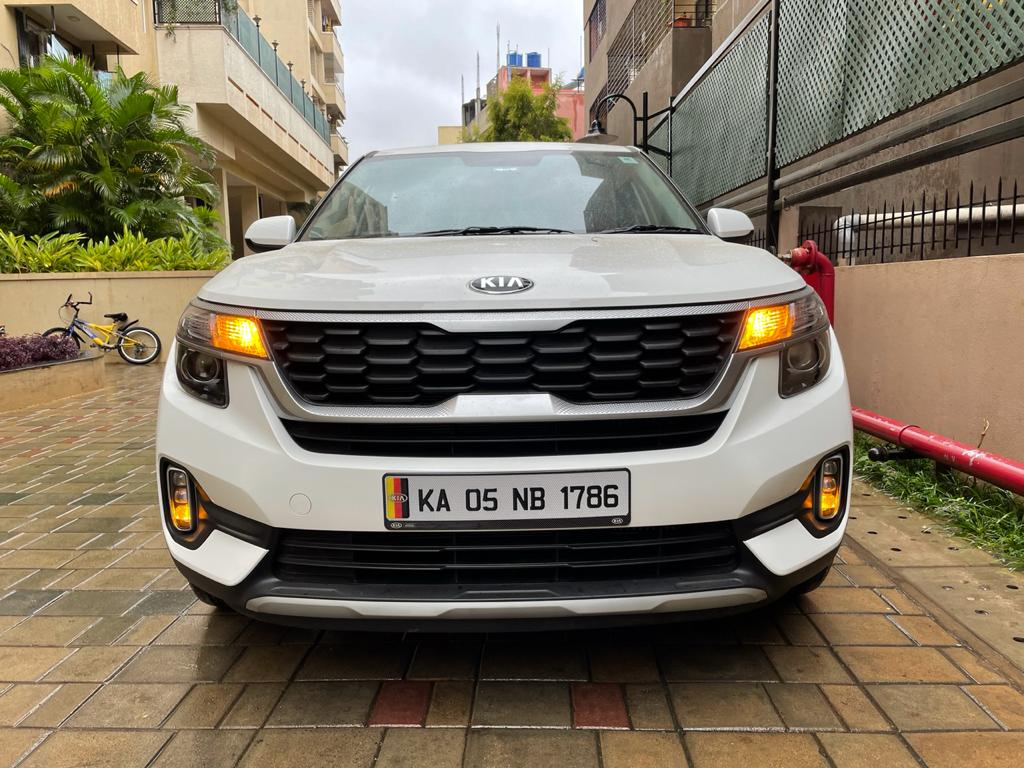

In [ ]:
img = cv2.imread('/content/kia-seltos-car-number-plate-designs.jpeg')
cv2_imshow(img)

In [ ]:
# Detect Number Plate
number_plate_cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml") #Load Haar Features

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
number_plate_segment = number_plate_cascade.detectMultiScale(gray) #detection of haar features

In [ ]:
for x,y,w,h in number_plate_segment:
    segment = gray[y:y+h, x:x+w] #crop segments fom the image
    text = pytesseract.image_to_string(segment, config = r'--psm 6') #recgnizing text using pyteserract
    print(text)

Ka 05 NB 1786



In [ ]:
cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2) #displaying rectangles
cv2.putText(img, text.strip(), (x,y-30), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0,0,255),3)

array([[[155, 209, 234],
        [151, 205, 230],
        [152, 205, 232],
        ...,
        [129, 146, 132],
        [ 96, 113,  99],
        [110, 127, 113]],

       [[149, 203, 228],
        [149, 203, 228],
        [151, 204, 231],
        ...,
        [130, 147, 133],
        [116, 133, 119],
        [105, 122, 108]],

       [[156, 206, 234],
        [155, 205, 233],
        [151, 201, 229],
        ...,
        [122, 139, 125],
        [131, 148, 134],
        [ 93, 110,  96]],

       ...,

       [[111, 156, 190],
        [114, 159, 192],
        [114, 159, 192],
        ...,
        [ 93, 146, 196],
        [ 90, 143, 193],
        [ 88, 141, 191]],

       [[113, 156, 189],
        [115, 159, 190],
        [114, 158, 189],
        ...,
        [ 87, 140, 190],
        [ 83, 136, 186],
        [ 84, 137, 187]],

       [[110, 154, 185],
        [112, 156, 187],
        [110, 154, 185],
        ...,
        [ 77, 130, 180],
        [ 79, 132, 182],
        [ 87, 140, 190]]

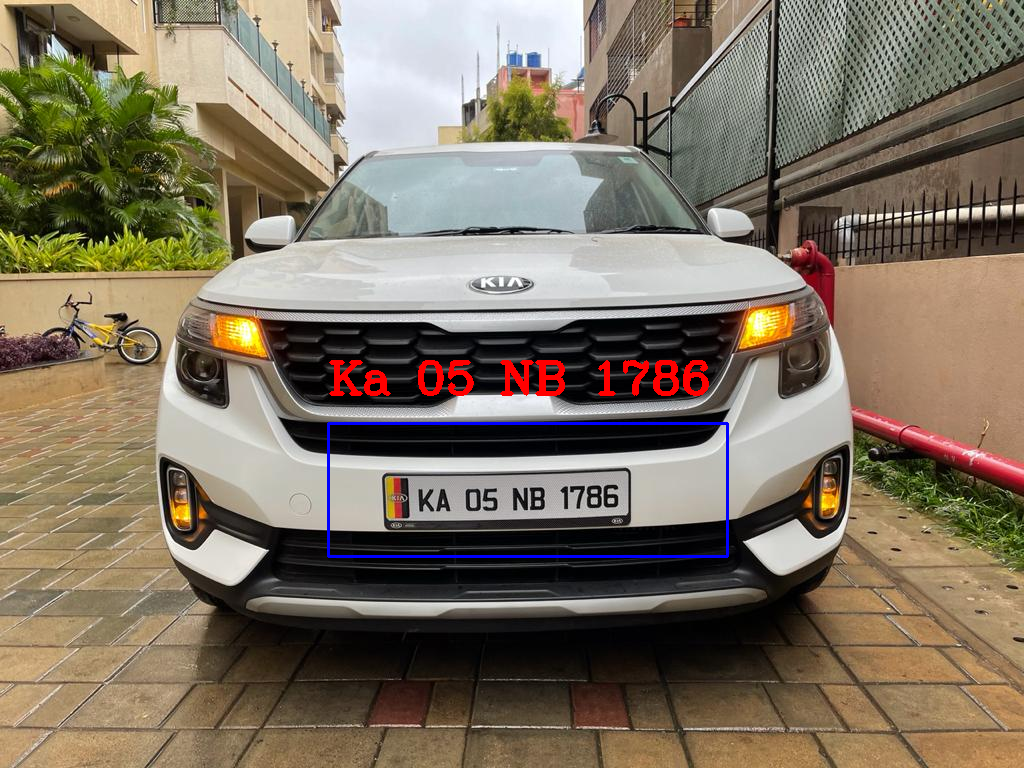

In [ ]:
cv2_imshow(img)